In [1]:
%load_ext autoreload
%autoreload 2

# Redes Neuronales Convolucionales (CNN)

![cnn.jpeg](cnn.jpeg)

- La meta es reducir el ancho/alto y aumentar la profundidad
- Transformar información espacial en features (feature maps)

In [2]:
import keras
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

Using TensorFlow backend.


# Videos

## Intro CNNs:

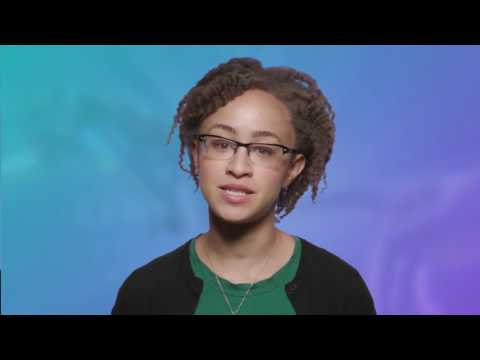

In [3]:
YouTubeVideo('HrYNL_1SV2Y')

## Capas convolucionales

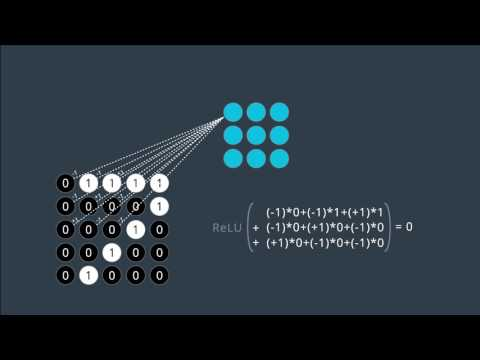

In [4]:
YouTubeVideo('h5R_JvdUrUI')

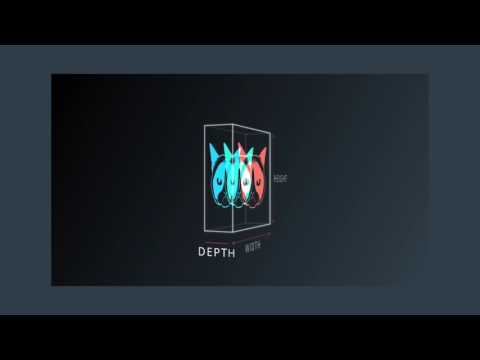

In [5]:
YouTubeVideo('RnM1D-XI--8')

## Capas pooling

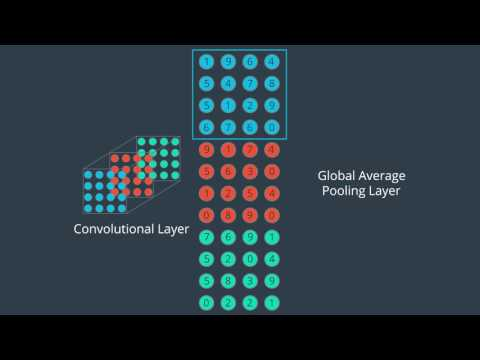

In [6]:
YouTubeVideo('OkkIZNs7Cyc')

## CNN en clasificación de imágenes

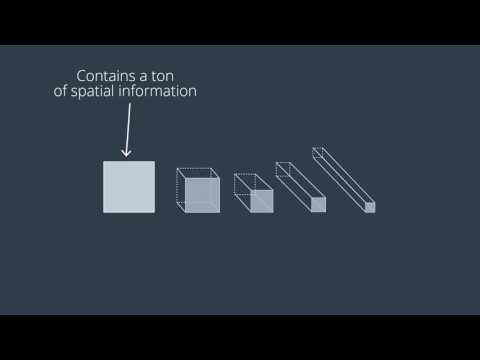

In [7]:
YouTubeVideo('l9vg_1YUlzg')

# Capas en las CNNs

## Capa convolucional:
**Su función es aumentar la profundidad (espacialidad --> features)**

![convolve.png](./convolve.png)
- [Ver Ejemplo Auto](https://github.com/udacity/aind2-cnn/blob/master/conv-visualization/conv_visualization.ipynb)

### Hyperparámetros
- Para aumentar la dimensionalidad de una CNN: Aumento la **cantidad de filtros**
- Para incrementar el tamaño/complejidad de los patrones detectados: Aumento el **tamaño del filtro**
- **Stride**: Paso. Determina el tamaño de las salidas del siguiente nivel
- **Padding**: Que hacemos con los bordes? 'same': mantiene la dimensión de la entrada; 'valid': no padding
- [Video](https://youtu.be/Qt5SQNcQfgo)

### Como usamos esto en [keras](https://keras.io/layers/convolutional/)?

In [8]:
from keras.models import Sequential
from keras.layers import Convolution2D, Dense

In [9]:
model = Sequential()
model.add(Convolution2D(filters=10, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        input_shape=(28,28,3)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 10)        280       
Total params: 280
Trainable params: 280
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- filters=1, strides=1, kernel_size=1, padding='same'
- filters=16, strides=1, kernel_size=1, padding='same'
- filters=1, strides=1, kernel_size=4, padding='same'
- filters=10, strides=1, kernel_size=4, padding='same'
- filters=1, strides=2, kernel_size=5, padding='same'
- filters=1, strides=2, kernel_size=5, padding='valid'
- filters=16, strides=2, kernel_size=5, padding='same'
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,1)
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,3)

### Convolucionales vs Densas

Mirar cantidad de **parametros** y **Output Shape**

Las CNN Reducen la cantidad de **parametros** y la **cantidad de conexiones**

Si hago una analogía con una capa densa, cuantas neuronas tengo a la salida en una CNN?
- Multiplico las dimensiones del output-shape

Supongamos una capa densa de 1250 neuronas con una entrada de una imagen de 28x28x1. Cuantas conexiones tengo y cuantos parametros?
- 784x1250 = 980.000 conexiones
- 784x1250 + 1250 = 981.250 parametros

In [10]:
model = Sequential()
model.add(Dense(1250, input_shape=(None,784)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, None, 1250)        981250    
Total params: 981,250
Trainable params: 981,250
Non-trainable params: 0
_________________________________________________________________


Para una capa **convolucional** con la misma entrada y la misma cantidad de neuronas a la salida?
- Claramente depende del tamaño del kernel

In [11]:
model = Sequential()
model.add(Convolution2D(filters=2, 
                        strides=1, 
                        kernel_size=4, 
                        padding='valid',
                        activation='relu',
                        input_shape=(28,28,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 2)         34        
Total params: 34
Trainable params: 34
Non-trainable params: 0
_________________________________________________________________


Supongamos un kernel de 4x4 con 2 filtros y padding valid:
- (4x4 conexiones por neurona) x (25x25x2 Neuronas) = 20.000 conexiones
- (4x4)x2 + 2 = 34 parametros

La poca cantidad de parametros respecto a conexiones se debe obviamente a que comparte parametros

Se podria entonces hacer que una capa densa tenga la misma salida que una convolucional usando valores de pesos convenientes.

La diferencia fundamental es que el aprendizaje es diferente ya que:
- Varios de los pesos deberian quedar en cero y no ser modificados por el alg de aprendizaje
- Varios de los pesos, los compartidos, deberián moverse iguales

### Entendiendo la salida y los pesos
Una vez que aprendio los parametros

In [12]:
def get_simple_model(activation = None, n_filters = 6, input_shape=(28,28,1)):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=input_shape, 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    return model

In [13]:
canales_entrada = 6
model = get_simple_model(n_filters = 4, input_shape=(28,28,canales_entrada))
model.summary()
print('Tensor de pesos:', model.get_weights()[0].shape)
print('Biases:', model.get_weights()[1].shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 4)         220       
Total params: 220
Trainable params: 220
Non-trainable params: 0
_________________________________________________________________
Tensor de pesos: (3, 3, 6, 4)
Biases: (4,)


Modificar los canales de entrada y ver que:
- El Output Shape no cambia
- La tercer dimensión del tensor de pesos cambia (y por supuesto la cantidad de parametros)

Es decir, la dimensión de los pesos es:  
**ancho x alto x canales x filtros**

Modificar tambien la cantidad de filtros para verificar como se cambia la ultima dimensión

### Analizando la salida filtrada

In [14]:
canales_entrada = 1
model = get_simple_model(n_filters = 6, input_shape=(28,28,canales_entrada))
model.summary()
print('Tensor de pesos:', model.get_weights()[0].shape)
print('Biases:', model.get_weights()[1].shape)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv1 (Conv2D)               (None, 26, 26, 6)         60        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________
Tensor de pesos: (3, 3, 1, 6)
Biases: (6,)


In [15]:
# Matriz de 3x3 inicializada aleatoriamente
print(model.get_weights()[0][:,:,0,1])
# Biases inicializados en cero
print(model.get_weights()[1])

[[-0.1991188  -0.08883558  0.13793346]
 [ 0.16249344 -0.13347282  0.23954812]
 [-0.07468058 -0.23620659 -0.04089803]]
[0. 0. 0. 0. 0. 0.]


In [16]:
from CNN_analysis_helper import plot_filter_coefs, plot_conv_filters, generate_random_image, plot_activations

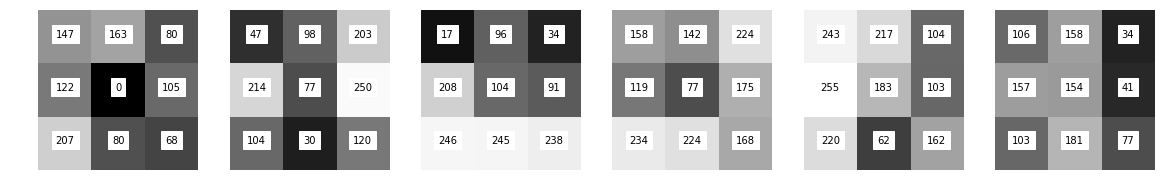

In [17]:
plot_filter_coefs('Conv1', model)

In [18]:
weights = model.get_layer('Conv1').get_weights()

In [19]:
weights[0][:,:,0,0] = np.array([[0, 0, 0], [0 , 1,  0], [0, 0, 0]])
weights[0][:,:,0,1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,0,2] = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
weights[0][:,:,0,3] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).T
weights[0][:,:,0,4] = np.array([[-1,-1, 0], [-1 , 0,  1], [0, 1, 1]])
weights[0][:,:,0,5] = np.array([[1 , 1,  1], [1, 1, 1], [1, 1, 1]])
#weights[0][:,:,0,5] = np.array([[1 , 1,  0], [1, 0, 0], [0, 0, 0]])
# weights[0][:,:,0,5] = np.array([[1, 1, 1], [1 , 1,  1], [1, 1, 1]])
# Normalizo
weights[0] = weights[0]/np.sqrt((weights[0]*weights[0]).sum(axis=0).sum(axis=0))
model.get_layer('Conv1').set_weights(weights)

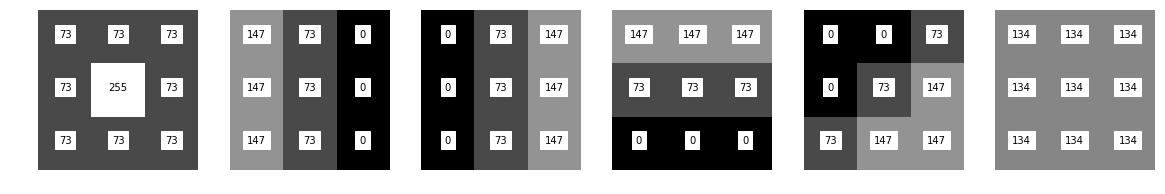

In [20]:
plot_filter_coefs('Conv1', model, normalize=True)

In [21]:
images_to_filter = np.load('images_to_filter.npy')
print(images_to_filter.shape)
activations_conv1_output = model.predict(images_to_filter)
print(activations_conv1_output.shape)

(5, 28, 28, 1)
(5, 26, 26, 6)


# Sin función de activación

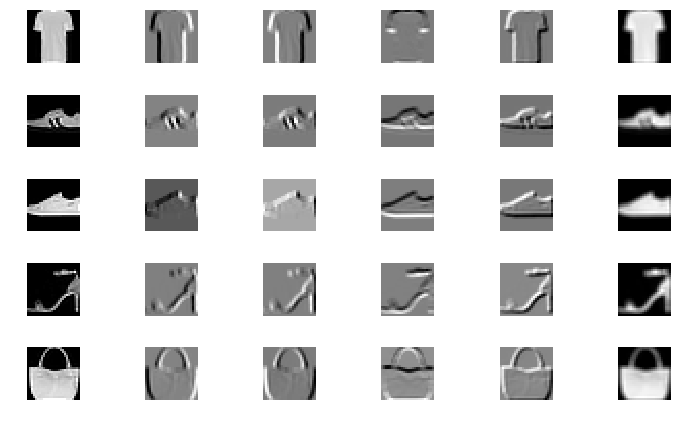

In [22]:
plot_activations(activations_conv1_output)

# Con Relu

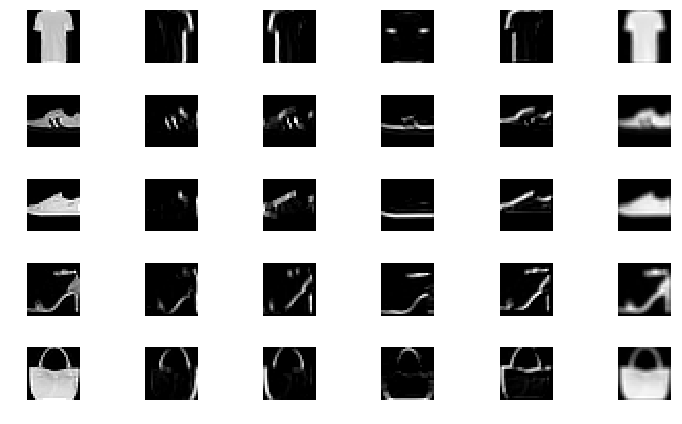

In [23]:
model_relu = get_simple_model('relu')
model_relu.set_weights(weights)
activations_output_relu = model_relu.predict(images_to_filter)
plot_activations(activations_output_relu)

# Con sigmoidea

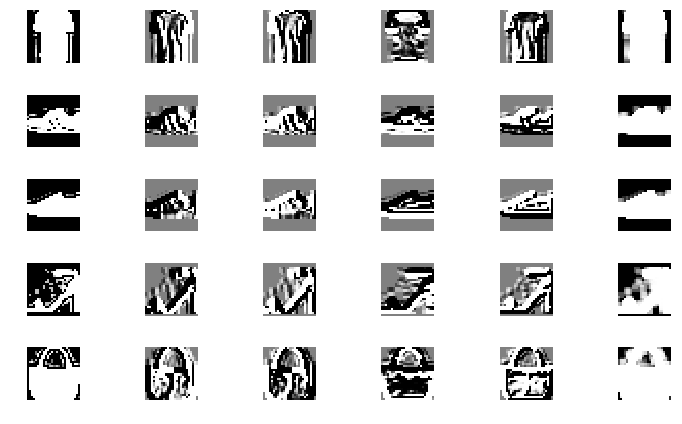

In [45]:
model_sigmoid = get_simple_model('sigmoid')
model_sigmoid.set_weights(weights)
activations_output_sigmoid = model_sigmoid.predict(images_to_filter)
plot_activations(activations_output_sigmoid)

# Sigmoidea normalizando

In [46]:
images_to_filter.max(), images_to_filter.min()

(255, 0)

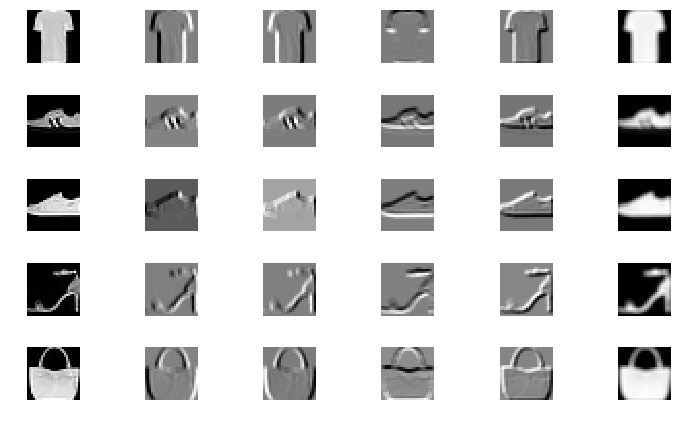

In [47]:
model_sigmoid_2 = get_simple_model('sigmoid')
model_sigmoid_2.set_weights(weights)
activations_output_sigmoid = model_sigmoid_2.predict(images_to_filter/256)
plot_activations(activations_output_sigmoid)

# Imagenes grandes con capa densa

In [27]:
model = Sequential()
model.add(Dense(100, input_shape=(None,500*375)))
model.add(Dense(5, input_shape=(None,500*375)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, None, 100)         18750100  
_________________________________________________________________
dense_3 (Dense)              (None, None, 5)           505       
Total params: 18,750,605
Trainable params: 18,750,605
Non-trainable params: 0
_________________________________________________________________


## Capa Pooling
### MaxPooling
**Su función es reducir la cantidad de parámetros, bajar la dimensionalidad**

Max Pooling

![Max-polling.png](Max-polling.png)

#### Hyperparámetros
MaxPooling
- Pool size
- Strides: En este caso esta en None por default lo que significa que strides=pool_size

#### En [keras](https://keras.io/layers/pooling/)

In [48]:
from keras.layers import MaxPooling2D

In [50]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same', input_shape=(32,32,1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 1)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


Hacer pruebas y explicar 'Output Shape' y 'Param #':
- pool_size=(2,2), strides=None, padding='same'
- pool_size=(4,2), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='valid'


In [51]:
def get_simple_model_pool(activation = None, n_filters = 6, input_shape=(28,28,1)):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=input_shape, 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    model.add(MaxPooling2D(3))
    return model

In [52]:
model_pool = get_simple_model_pool(activation='relu')

In [53]:
model_pool.get_layer('Conv1').set_weights(weights)

In [54]:
activations_pool_output = model_pool.predict(images_to_filter)
print(activations_pool_output.shape)

(5, 8, 8, 6)


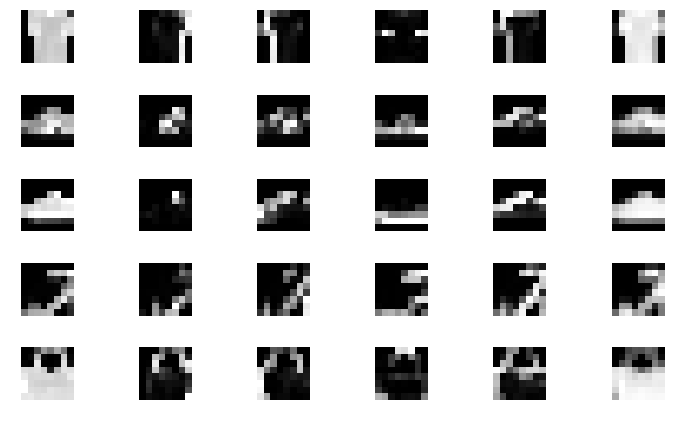

In [55]:
plot_activations(activations_pool_output)

### Global Average Pooling  
- Un resultado(Promedio) por cada canal a diferencia que el Max Pooling que se aplica dentro del mismo canal
- Utilizada para reducir la dimensionalidad en las ultimas capas
![GAP.png](GAP.png)

#### En [keras](https://keras.io/layers/pooling/)

In [57]:
from keras.layers import GlobalAveragePooling2D, Flatten

In [59]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(3,3,20)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_4 ( (None, 20)                0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


### AveragePooling

In [37]:
from keras.layers import AveragePooling2D

In [38]:
model = Sequential()
model.add(AveragePooling2D(4, 4, input_shape=(32,32,20)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
average_pooling2d_1 (Average (None, 8, 8, 20)          0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


## Preguntas:

- Como cierro la red? Que utlilzar? GAP o DENSA?
- Que implica hacer mas grande o mas pequeño el filtro?

# Armamos la red AlexNet:

### AlexNet [(paper)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- 2012 
- Error de top-5 de 15.3%, más de 10.8% arriba del segundo. 
- ImageNet: En 1.2 millones de imágenes de alta resolución, 1000 clases
- Diseñada por: SuperVision group, consisting of Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever.

**Lo novedoso**: Dropout, RELUs
(Dropout a la salida de las capas de 2048)

**Arquitectura:**
- Rectangulares con center-crop (Lado mas corto 256)
- 60 millones de parámetros
- 650 mil neuronas
- 5 capas convolucionales
- Algunos seguidos de capas pooling
- 3 capas densas
- SoftMax de 1000 categorias (1000 neuronas a la salida)
- RELUs en vez de Sigmoideas
- Dropout para evitar regularización

**Entrenamiento:**
- CUDA para soporte de GPU
- Data augmentation
- SGD
- Batch size = 128
- Momentum 0.9
- Learning rate = 0.01
- weight decay of 0.0005 (equivalente a L2 regularization)
- 5 a 6 días de entrenamiento en 2 [GTX 580](https://www.geforce.com/hardware/desktop-gpus/geforce-gtx-580) 3GB GPUs

![alexnet2.png](alexnet2.png)

# Armarla con Keras:

In [60]:
from solutions import get_alexnet, get_YOLO

In [61]:
from keras.layers import Dropout

In [41]:
alexnet_model = Sequential()
alexnet_model.add(Convolution2D(filters=96, kernel_size=11, strides=4,
                                input_shape=(227,227,3), 
                                padding='valid', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size = 3, strides=2))
alexnet_model.add(Convolution2D(filters=256, kernel_size=5, padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size = 3, strides=2))
alexnet_model.add(Convolution2D(filters=384, kernel_size=3, padding='same', activation='relu'))
alexnet_model.add(Convolution2D(filters=384, kernel_size=3, padding='same', activation='relu'))
alexnet_model.add(Convolution2D(filters=256, strides=2, kernel_size=3, padding='valid', activation='relu'))
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(1000, activation='softmax'))
alexnet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 256)         884992    
__________

## Reemplazo de FC por Convolucionales e implementación de sliding window eficiente
https://www.youtube.com/watch?v=mFunGvD5sVc

Supongamos que tengo una entrada de 5x5. Si hago flatten para poner una FC, me queda una entrada de 25x1.  
La cantidad de parámetros a aprender suponiendo que tengo una salida con 4 neuronas es:  
25*4 + 4 = 104

In [42]:
from keras.layers import Dense
model_dense = Sequential()
model_dense.add(Dense(4, input_shape=(25,)))
model_dense.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


Si utilizo una convolucional con la misma entrada que salida, para tener la misma cantidad de parametros, tengo que poner el tamaño del filtro igual a la entrada: 5x5  
Y la cantidad de filtros igual a la salida

In [43]:
model_slide = Sequential()
model_slide.add(Convolution2D(filters= 4, kernel_size=5, input_shape=(5,5,1)))
model_slide.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 1, 1, 4)           104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


Que pasa si aumento la entrada:

In [44]:
width = 6
height = width
model_slide = Sequential()
model_slide.add(Convolution2D(filters= 4, kernel_size=5, input_shape=(height,width,1)))
model_slide.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 2, 2, 4)           104       
Total params: 104
Trainable params: 104
Non-trainable params: 0
_________________________________________________________________


![sliding-wind-implem.png](sliding-wind-implem.png)

Layer         kernel  stride  output shape
---------------------------------------------
Input                          (416, 416, 3)
Convolution    3×3      1      (416, 416, 16)
MaxPooling     2×2      2      (208, 208, 16)
Convolution    3×3      1      (208, 208, 32)
MaxPooling     2×2      2      (104, 104, 32)
Convolution    3×3      1      (104, 104, 64)
MaxPooling     2×2      2      (52, 52, 64)
Convolution    3×3      1      (52, 52, 128)
MaxPooling     2×2      2      (26, 26, 128)
Convolution    3×3      1      (26, 26, 256)
MaxPooling     2×2      2      (13, 13, 256)
Convolution    3×3      1      (13, 13, 512)
MaxPooling     2×2      1      (13, 13, 512)
Convolution    3×3      1      (13, 13, 1024)
Convolution    3×3      1      (13, 13, 1024)
Convolution    1×1      1      (13, 13, 125)